# Questions to be answered
### Factors affecting Mental Health Resource-Seeking
Does resource seeking change by geographical location? - Kevin

    Visualize resource seeking using a map


What, if any, is the correlation between company size and employees seeking mental health resources? - Kevin

    Visualize any patterns in company size vs employees seeking support


Breakdown of mental health resource seeking by gender - June

    Visualize breakdown by gender


Who seeks mental health resources more often: remote or in-person employees? - June

    Visualize gender breakdown of remote vs in-person employees seeking MHR

### How Does Autonomy Affect Mental Health?
Does self-employment positively affect mental health status? - Maxiel

    Visualize differences between self-employed and tech employees mental health

### Productivity/ company seriousness/ how does mental health interfere with work
Do the employees of companies with more supportive mental health policies have better health outcomes? - Oliver

    How many companies offer mental health resources?


Of companies that offer MHR, what is the utilization rate? In other words, what % of employees use offered MHR? - Jordan

    Visualize utilization rate across all companies


How does social perception of mental health affect utilization rate? - Brendan

    Visualize differences in MHR utilization at companies depending on perception of mental health

# Dependencies and Setup, overall


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import scipy.stats as st
import geopandas as gpd
import plotly
import plotly.express as px
# install geopandas:
# pip install geopandas
# pip install geopandas fiona

# install plotly
# pip install plotly
# pip install plotly_express

# dataset to map state names to state codes so we can create a choropleth map (first plot)
# link to dataset
# https://www.kaggle.com/datasets/justinrwong/us-states-to-abbreviations
# renamed to states_to_codes.csv

# state shape file to draw out state shapes using plotly express(link will start a download)
# https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_1_states_provinces.zip



# URL of the CSV file on GitHub
github_csv_url = "https://raw.githubusercontent.com/ILoveSpreadsheetsMoreThanImAllowedToSay/Project_01/main/Resources/mental-heath-in-tech-clean.csv"


# Read the data
df_generic = pd.read_csv(github_csv_url)



# Factors affecting Mental Health Resource-Seeking


### Kevin
Section to investigate the following:

Does resource seeking change by geographical location? - Kevin

    Visualize resource seeking using a map


What, if any, is the correlation between company size and employees seeking mental health resources? - Kevin

    Visualize any patterns in company size vs employees seeking support


In [2]:


# saving only necessary columns
kd_df_columns = df_generic[[
    'Index',
    'How many employees does your company or organization have?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    'What country do you live in?',
    'What US state or territory do you live in?',
    'What country do you work in?',
    'What US state or territory do you work in?'
]]

# renaming columns for brevity
kd_df_columns = kd_df_columns.rename(columns = {
    'How many employees does your company or organization have?': 'company_size',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'sought_treatment',
    'What country do you live in?': 'living_country',
    'What US state or territory do you live in?': 'living_state',
    'What country do you work in?': 'working_country',
    'What US state or territory do you work in?': 'working_state'})

print(kd_df_columns.shape)
kd_df_columns.head()

(1433, 7)


,Index,company_size,sought_treatment,living_country,living_state,working_country,working_state
0,1,26-100,0,United Kingdom,NaN,United Kingdom,NaN
1,2,45102,1,United States of America,Illinois,United States of America,Illinois
2,3,45102,1,United Kingdom,NaN,United Kingdom,NaN
3,4,NaN,1,United Kingdom,NaN,United Kingdom,NaN
4,5,45102,1,United States of America,Illinois,United States of America,Illinois


In [3]:
### NOTE: removing all rows of responses not from the united states

kd_df_geographical = kd_df_columns[kd_df_columns['living_country'] == 'United States of America']

### NOTE: removing all responses that do not give a US state (all responses from US provided a state)
kd_df_geographical = kd_df_geographical.dropna(subset = ['living_state'])

print(kd_df_geographical.shape)
kd_df_geographical.head()

(840, 7)


,Index,company_size,sought_treatment,living_country,living_state,working_country,working_state
1,2,45102,1,United States of America,Illinois,United States of America,Illinois
4,5,45102,1,United States of America,Illinois,United States of America,Illinois
6,7,26-100,0,United States of America,Tennessee,United States of America,Tennessee
7,8,More than 1000,1,United States of America,Virginia,United States of America,Virginia
8,9,26-100,1,United States of America,California,United States of America,California


In [4]:
### grouping by state to find percent of people who have sought treatment in each state
kd_df_geo_grouped = kd_df_geographical.groupby('living_state').mean()

# renaming column to reflect proportion
kd_df_geo_grouped = kd_df_geo_grouped.rename(columns = {'sought_treatment': 'Proportion of Respondents who have sought treatment'})
kd_df_geo_grouped = kd_df_geo_grouped[['Proportion of Respondents who have sought treatment']]

# resetting index to keep state column in
kd_df_geo_grouped = kd_df_geo_grouped.reset_index()

# merging proportions back into geographical dataframe in case we need sought_treatment_proportion column
kd_df_geo_merged = kd_df_geographical.merge(right = kd_df_geo_grouped,
                                            how = 'left',
                                            left_on = 'living_state',
                                            right_on = 'living_state')

kd_df_geo_merged.head()

/var/folders/nq/c88q1rms7dxd3bwm48h7gb6m0000gn/T/ipykernel_85147/3957479869.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kd_df_geo_grouped = kd_df_geographical.groupby('living_state').mean()


,Index,company_size,sought_treatment,living_country,living_state,working_country,working_state,Proportion of Respondents who have sought treatment
0,2,45102,1,United States of America,Illinois,United States of America,Illinois,0.696429
1,5,45102,1,United States of America,Illinois,United States of America,Illinois,0.696429
2,7,26-100,0,United States of America,Tennessee,United States of America,Tennessee,0.592593
3,8,More than 1000,1,United States of America,Virginia,United States of America,Virginia,0.733333
4,9,26-100,1,United States of America,California,United States of America,California,0.715385


In [10]:
# reading in shape file to create US map
state_file_path = 'https://github.com/ILoveSpreadsheetsMoreThanImAllowedToSay/Project_01/raw/KevinDeng2/data/states_provinces/ne_110m_admin_1_states_provinces.shp'

states_shapes = gpd.read_file(state_file_path)

# merging in state codes using state name
geo_merged = kd_df_geo_merged.merge(states_shapes, left_on='living_state', right_on='name', how='left')


### merge the state codes from the states_to_codes.csv file in on the living_state column
state_codes = pd.read_csv('https://github.com/ILoveSpreadsheetsMoreThanImAllowedToSay/Project_01/raw/KevinDeng2/data/states_to_codes.csv')

geo_merged = geo_merged.merge(right = state_codes, left_on = 'living_state', right_on = 'State')

geo_merged.head()


,Index,company_size,sought_treatment,living_country,living_state,working_country,working_state,Proportion of Respondents who have sought treatment,featurecla,scalerank,...,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,State,Standard,Postal
0,2,45102,1,United States of America,Illinois,United States of America,Illinois,0.696429,Admin-1 scale rank,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-91.43033 40.36860, -91.41023 40.551...",Illinois,Ill.,IL
1,5,45102,1,United States of America,Illinois,United States of America,Illinois,0.696429,Admin-1 scale rank,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-91.43033 40.36860, -91.41023 40.551...",Illinois,Ill.,IL
2,84,26-100,0,United States of America,Illinois,United States of America,Illinois,0.696429,Admin-1 scale rank,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-91.43033 40.36860, -91.41023 40.551...",Illinois,Ill.,IL
3,90,26-100,1,United States of America,Illinois,United States of America,Illinois,0.696429,Admin-1 scale rank,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-91.43033 40.36860, -91.41023 40.551...",Illinois,Ill.,IL
4,98,26-100,0,United States of America,Illinois,United States of America,Illinois,0.696429,Admin-1 scale rank,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-91.43033 40.36860, -91.41023 40.551...",Illinois,Ill.,IL


In [11]:
fig = px.choropleth(geo_merged,
                    locations='Postal', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Proportion of Respondents who have sought treatment',
                    color_continuous_scale="Viridis_r")

fig.show()

In [12]:
### making separate dataframe to track company sizes

# checking for responses that do not pertain to company size
print(kd_df_columns['company_size'].unique())


### NOTE: removing all rows with nnan company size responses
kd_df_size = kd_df_columns[kd_df_columns['company_size'].isin(['44931', '45102', '26-100', '100-500', '500-1000', 'More than 1000'])]

# replacing 44931 and 45102, which were read in as dates, with 1-5 and 6-25 respectively
kd_df_size['company_size'] = kd_df_size['company_size'].replace('44931', '1-5')
kd_df_size['company_size'] = kd_df_size['company_size'].replace('45102', '6-25')

# replacing 'More than 1000' with '>1000' for brevity
kd_df_size['company_size'] = kd_df_size['company_size'].replace('More than 1000', '>1000')


# creating categorical variable so that I can order bar chart correctly
kd_df_size['company_size'] = pd.Categorical(kd_df_size['company_size'], ['1-5', '6-25', '26-100', '100-500', '>1000'])

# sorting values by company size buckets (index is preserved)
kd_df_size = kd_df_size.sort_values('company_size')

kd_df_size.head(100)

['26-100' '45102' nan 'More than 1000' '100-500' '500-1000' '44931']


/var/folders/nq/c88q1rms7dxd3bwm48h7gb6m0000gn/T/ipykernel_85147/3649719780.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nq/c88q1rms7dxd3bwm48h7gb6m0000gn/T/ipykernel_85147/3649719780.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nq/c88q1rms7dxd3bwm48h7gb6m0000gn/T/ipykernel_85147/3649719780.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Index,company_size,sought_treatment,living_country,living_state,working_country,working_state
702,703,1-5,1,United States of America,New Jersey,United States of America,New Jersey
812,813,1-5,0,India,NaN,India,NaN
780,781,1-5,1,United States of America,Texas,United States of America,Texas
126,127,1-5,1,United States of America,Indiana,United States of America,Indiana
730,731,1-5,0,Canada,NaN,Canada,NaN
...,...,...,...,...,...,...,...
566,567,6-25,1,United Kingdom,NaN,United Kingdom,NaN
565,566,6-25,0,Slovakia,NaN,Slovakia,NaN
561,562,6-25,1,United States of America,Washington,United States of America,Washington
982,983,6-25,0,United States of America,Massachusetts,United States of America,Massachusetts


/var/folders/nq/c88q1rms7dxd3bwm48h7gb6m0000gn/T/ipykernel_85147/2910640467.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



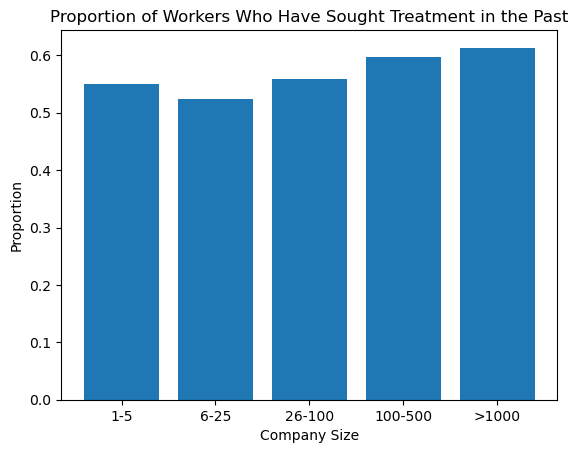

In [16]:
# grouping by company size to find percent of respondents who have sought mental health treatment
# by company size
kd_df_size_counts = kd_df_size.groupby('company_size').mean()
kd_df_size_counts = kd_df_size_counts.reset_index()

# generating bar plot
plt.bar(data = kd_df_size_counts, x = 'company_size', height = 'sought_treatment')

# adding axis labels and title
plt.title('Proportion of Workers Who Have Sought Treatment in the Past')
plt.xlabel('Company Size')
plt.ylabel('Proportion')

#plt.savefig('./images/KD_sought_treatment_proportion_company_size.png')
plt.show()

### June
Section to investigate the following:

Breakdown of mental health resource seeking by gender - June

    Visualize breakdown by gender


Who seeks mental health resources more often: remote or in-person employees? - June

    Visualize gender breakdown of remote vs in-person employees seeking MHR

In [121]:

gender_remote_columns = ["What is your gender?", "Do you currently have a mental health disorder?",
                    "Is your employer primarily a tech company/organization?",
                    "Is your primary role within your company related to tech/IT?",
                    "Do you work remotely?"]
df_gender_remote = df_generic[gender_remote_columns].copy()
df_gender_remote

,What is your gender?,Do you currently have a mental health disorder?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you work remotely?
0,Male,No,1.0,NaN,Sometimes
1,Male,Yes,1.0,NaN,Never
2,Male,No,1.0,NaN,Always
3,Male,Yes,NaN,NaN,Sometimes
4,Female,Yes,0.0,1.0,Sometimes
...,...,...,...,...,...
1428,Female,No,NaN,NaN,Sometimes
1429,Male,No,NaN,NaN,Sometimes
1430,Male,Maybe,1.0,NaN,Sometimes
1431,Female,Yes,0.0,1.0,Sometimes


In [122]:
# Columns to extract and their new names
gender_remote_extract = {
    "What is your gender?": "Gender",
    "Do you currently have a mental health disorder?": "Mental_Status",
    "Is your employer primarily a tech company/organization?": "Company_Type",
    "Is your primary role within your company related to tech/IT?": "Role_Type",
    "Do you work remotely?": "Work_type"
}

df_gender_remote.rename(columns=gender_remote_extract, inplace=True)
df_gender_remote

,Gender,Mental_Status,Company_Type,Role_Type,Work_type
0,Male,No,1.0,NaN,Sometimes
1,Male,Yes,1.0,NaN,Never
2,Male,No,1.0,NaN,Always
3,Male,Yes,NaN,NaN,Sometimes
4,Female,Yes,0.0,1.0,Sometimes
...,...,...,...,...,...
1428,Female,No,NaN,NaN,Sometimes
1429,Male,No,NaN,NaN,Sometimes
1430,Male,Maybe,1.0,NaN,Sometimes
1431,Female,Yes,0.0,1.0,Sometimes


In [123]:
# Create a new column based on the conditions
df_gender_remote["Tech_Check"] = (df_gender_remote["Company_Type"] == 1) | (df_gender_remote["Role_Type"] == 1)
df_gender_remote = df_gender_remote[df_gender_remote["Tech_Check"] == True]
df_gender_remote = df_gender_remote[df_gender_remote["Gender"] != "Unspecified"]

work_type = {
    "Never": "In-person",
    "Sometimes": "Hybrid",
    "Always": "Remote"
}
df_gender_remote.loc[:, "Work_type"] = df_gender_remote["Work_type"].replace(work_type)
df_gender_mental = df_gender_remote.copy()
df_gender_mental = df_gender_mental[df_gender_mental["Mental_Status"] != "No"]

# Print the updated DataFrame
df_gender_mental


,Gender,Mental_Status,Company_Type,Role_Type,Work_type,Tech_Check
1,Male,Yes,1.0,NaN,In-person,True
4,Female,Yes,0.0,1.0,Hybrid,True
5,Male,Yes,1.0,NaN,Hybrid,True
7,Female,Yes,1.0,NaN,Remote,True
8,Female,Yes,0.0,1.0,Hybrid,True
...,...,...,...,...,...,...
1426,Female,Yes,1.0,NaN,Hybrid,True
1427,Female,Yes,1.0,NaN,Remote,True
1430,Male,Maybe,1.0,NaN,Hybrid,True
1431,Female,Yes,0.0,1.0,Hybrid,True


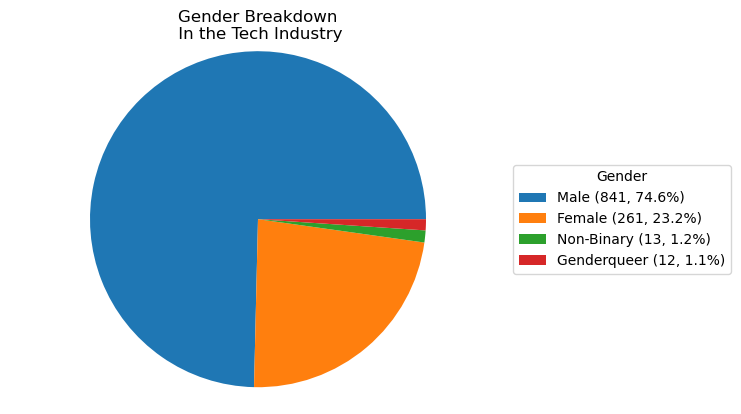

In [124]:
# Generate a pie plot showing the distribution of gender
gender_pyplot_pie = df_gender_remote["Gender"].value_counts()
labels = gender_pyplot_pie.index
sizes = gender_pyplot_pie.values

# Create the pie chart without labels and percentages
wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct="",  pctdistance=0.85)

plt.title("Gender Breakdown\n In the Tech Industry", loc='center', y=1.0,  verticalalignment='center')
plt.axis('equal')

# Add a clean legend with percentages and counts
legend_labels = [f"{label} ({size}, {size/sum(sizes)*100:.1f}%)"
                 for label, size in zip(labels, sizes)]
plt.legend(title="Gender", labels=legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


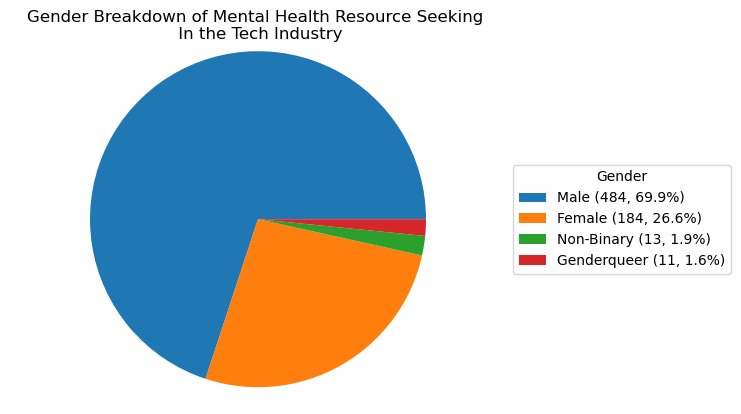

In [125]:
# Generate a pie plot showing the distribution of gender for those defined as seeking mental health resources
gender_mental_pyplot_pie = df_gender_mental["Gender"].value_counts()
labels = gender_mental_pyplot_pie.index
sizes = gender_mental_pyplot_pie.values

# Create the pie chart without labels and percentages
wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct="",  pctdistance=0.85)

plt.title("Gender Breakdown of Mental Health Resource Seeking \n In the Tech Industry", loc='center', y=1.0,  verticalalignment='center')
plt.axis('equal')

# Add a clean legend with percentages and counts
legend_labels = [f"{label} ({size}, {size/sum(sizes)*100:.1f}%)"
                 for label, size in zip(labels, sizes)]
plt.legend(title="Gender", labels=legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [126]:
# Create two Series
Industry = df_gender_remote["Gender"].value_counts()
MHR = df_gender_mental["Gender"].value_counts()

# Create a DataFrame by combining the two Series
combined_df = pd.DataFrame({
                            "Industry": Industry,
                            "MHR Seekers": MHR})

# Calculate totals and create a new row
totals = combined_df.sum(numeric_only=True)

# Convert totals to a DataFrame and append to the original DataFrame
# Convert totals to a DataFrame
totals_df = pd.DataFrame([totals], index=["Totals"])

# Combine DataFrames using pd.concat()
combined_df = pd.concat([combined_df, totals_df])

# Replace the value 0 in the index with "Totals"
combined_df = combined_df.rename(index={0: "Totals"})

# Print the combined DataFrame
# Calculate the division and create a new column as a percentage
combined_df["Seeking %"] = (combined_df["MHR Seekers"] / combined_df["Industry"]) * 100

# Format the DivisionPercentage column as a percentage with two decimal places
combined_df["Seeking %"] = combined_df["Seeking %"].apply("{:.2f}%".format)
combined_df = combined_df.rename(index={0: "Totals"})
combined_df

,Industry,MHR Seekers,Seeking %
Male,841,484,57.55%
Female,261,184,70.50%
Non-Binary,13,13,100.00%
Genderqueer,12,11,91.67%
Totals,1127,692,61.40%


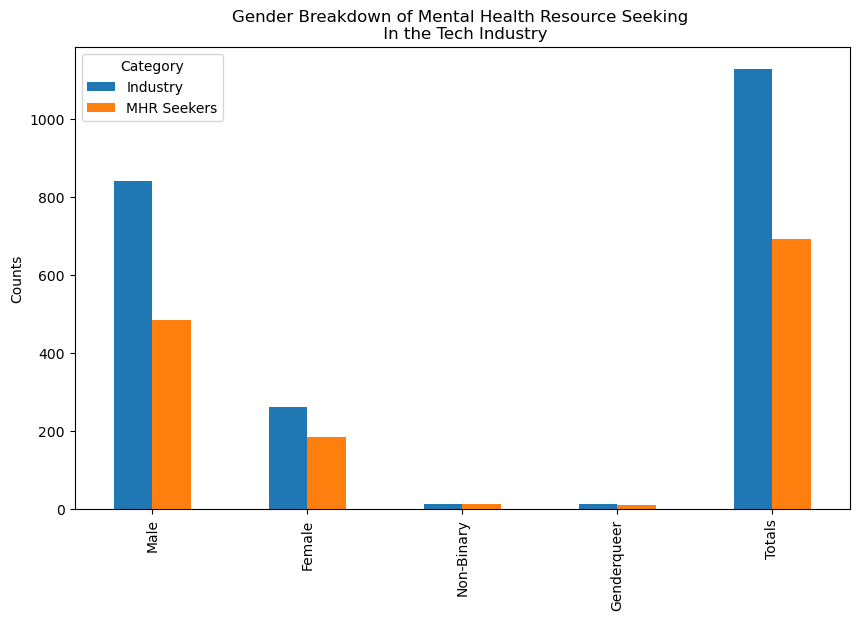

In [127]:
# Remove the Seeking % column for plotting
plot_df = combined_df.drop(columns=["Seeking %"])

# Create a bar chart
ax = plot_df.plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.ylabel("Counts")
plt.title("Gender Breakdown of Mental Health Resource Seeking \n In the Tech Industry")

# Show the legend
plt.legend(title="Category")

# Display the chart
plt.show()

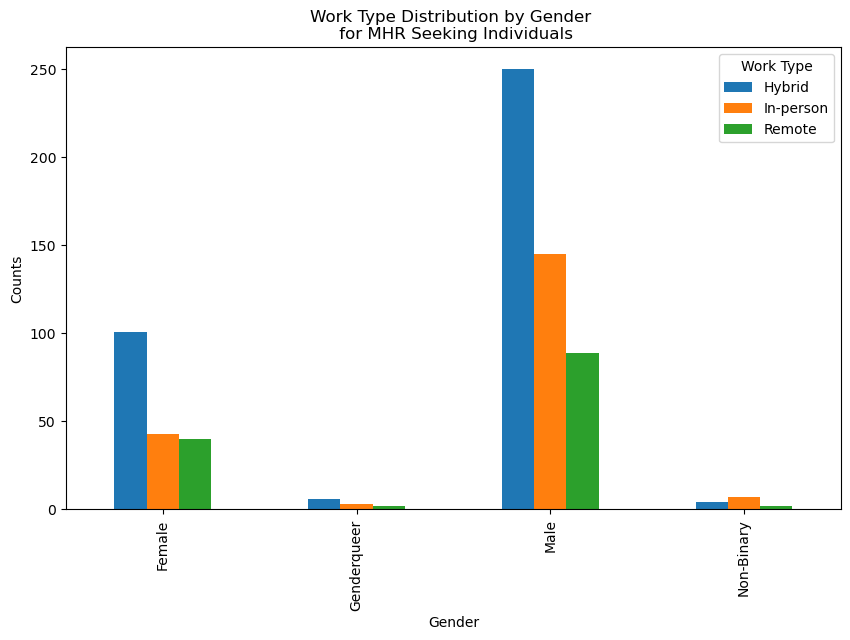

In [128]:

# Assistance on this one came from https://stackoverflow.com/questions/39013425/multiple-stacked-bar-plot-with-pandas
# Documentation for unstack from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

work_type = df_gender_mental.copy()

# Group by 'Gender' and 'Work_type' and calculate the counts
work_type_counts = work_type.groupby(["Gender", "Work_type"]).size().unstack()

# Create a bar chart
ax = work_type_counts.plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.ylabel("Counts")
plt.title("Work Type Distribution by Gender \n for MHR Seeking Individuals")

# Show the legend
plt.legend(title="Work Type")

# Display the chart
plt.show()



# How Does Autonomy Affect Mental Health?

### Maxiel
Section to investigate the following:

Does self-employment positively affect mental health status? - Maxiel

    Visualize differences between self-employed and tech employees mental health


# Productivity/ company seriousness/ how does mental health interfere with work



### Oliver
Section to investigate the following:
Do the employees of companies with more supportive mental health policies have better health outcomes? - Oliver

    How many companies offer mental health resources?


### Jordan
Section to investigate the following:
Of companies that offer MHR, what is the utilization rate? In other words, what % of employees use offered MHR? - Jordan

    Visualize utilization rate across all companies

In [129]:
mhealth_df = df_generic.loc[:, ['Index','Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?',
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
    'Have you had a mental health disorder in the past?',
    'Do you currently have a mental health disorder?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?']]


In [130]:
#Employer provided health care
mhealth_df['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()
mhealth_df['Does your employer provide mental health benefits as part of healthcare coverage?'].unique()
mhealth_df['Does your employer provide mental health benefits as part of healthcare coverage?']=mhealth_df['Does your employer provide mental health benefits as part of healthcare coverage?'].replace('Not eligible for coverage / N/A', "Not eligible / doesn't know")



In [131]:
#Making, "I don't know" into "Not eligible / doesn't know" to be more clear
mhealth_df['Does your employer provide mental health benefits as part of healthcare coverage?']=mhealth_df['Does your employer provide mental health benefits as part of healthcare coverage?'].replace("I don't know", "Not eligible / doesn't know")

#Changes shown in values below
mhealth_df['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()


Yes                            531
Not eligible / doesn't know    402
No                             213
Name: Does your employer provide mental health benefits as part of healthcare coverage?, dtype: int64

In [132]:
#Resources
mhealth_df["Does your employer offer resources to learn more about mental health concerns and options for seeking help?"].unique()
mhealth_df["Does your employer offer resources to learn more about mental health concerns and options for seeking help?"].value_counts()
mhealth_df['Does your employer offer resources to learn more about mental health concerns and options for seeking help?']=mhealth_df['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].replace("I don't know", "Not Aware")
mhealth_df["Does your employer offer resources to learn more about mental health concerns and options for seeking help?"].unique()
mhealth_df["Does your employer offer resources to learn more about mental health concerns and options for seeking help?"].value_counts()


No           531
Not Aware    320
Yes          295
Name: Does your employer offer resources to learn more about mental health concerns and options for seeking help?, dtype: int64

In [133]:
#Treatment
mhealth_df['Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?'].unique()
mhealth_df['Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?'].value_counts()
mhealth_df['Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?']=mhealth_df['Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?'].replace(1.0, "Yes")
mhealth_df['Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?']=mhealth_df['Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?'].replace(0.0, "No")
mhealth_df['Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?'].unique()
mhealth_df['Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?'].value_counts()


Yes    185
No     102
Name: Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?, dtype: int64

In [134]:
#had mental health disorder
mhealth_df['Have you had a mental health disorder in the past?'].unique()
mhealth_df['Have you had a mental health disorder in the past?'].value_counts()
mhealth_df['Have you had a mental health disorder in the past?'] = mhealth_df['Have you had a mental health disorder in the past?'].replace("Maybe", "Unsure")
mhealth_df['Have you had a mental health disorder in the past?'].unique()
mhealth_df['Have you had a mental health disorder in the past?'].value_counts()


Yes       736
No        451
Unsure    246
Name: Have you had a mental health disorder in the past?, dtype: int64

In [135]:
#currently have health disorder
mhealth_df['Do you currently have a mental health disorder?'].unique()
mhealth_df['Do you currently have a mental health disorder?'].value_counts()
mhealth_df['Do you currently have a mental health disorder?']=mhealth_df['Do you currently have a mental health disorder?'].replace("Maybe", "Unsure")
mhealth_df['Do you currently have a mental health disorder?'].unique()
mhealth_df['Do you currently have a mental health disorder?'].value_counts()


Yes       575
No        531
Unsure    327
Name: Do you currently have a mental health disorder?, dtype: int64

In [136]:
#Sought Treatment
mhealth_df['Have you ever sought treatment for a mental health issue from a mental health professional?'].unique()
mhealth_df['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts()
mhealth_df['Have you ever sought treatment for a mental health issue from a mental health professional?']=mhealth_df['Have you ever sought treatment for a mental health issue from a mental health professional?'].replace(1, "Yes")
mhealth_df['Have you ever sought treatment for a mental health issue from a mental health professional?']=mhealth_df['Have you ever sought treatment for a mental health issue from a mental health professional?'].replace(0, "No")
mhealth_df['Have you ever sought treatment for a mental health issue from a mental health professional?'].unique()
mhealth_df['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts()
mhealth_df.head()


,Index,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Does your employer provide mental health benefits as part of healthcare coverage?,Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you ever sought treatment for a mental health issue from a mental health professional?
0,1,NaN,Not eligible / doesn't know,No,Yes,No,No
1,2,NaN,No,Yes,Yes,Yes,Yes
2,3,NaN,No,No,Unsure,No,Yes
3,4,Yes,NaN,NaN,Yes,Yes,Yes
4,5,NaN,Yes,No,Yes,Yes,Yes


In [137]:
#Replacing Nan with "" to make data more readable
clean_df = mhealth_df.fillna("")
clean_df.head(5)


,Index,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Does your employer provide mental health benefits as part of healthcare coverage?,Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you ever sought treatment for a mental health issue from a mental health professional?
0,1,,Not eligible / doesn't know,No,Yes,No,No
1,2,,No,Yes,Yes,Yes,Yes
2,3,,No,No,Unsure,No,Yes
3,4,Yes,,,Yes,Yes,Yes
4,5,,Yes,No,Yes,Yes,Yes


In [138]:
#Selecting only necessary data for analysis 
main_df=clean_df.loc[:, ["Does your employer provide mental health benefits as part of healthcare coverage?", "Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?", "Do you currently have a mental health disorder?"]]
main_df.head()

,Does your employer provide mental health benefits as part of healthcare coverage?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you currently have a mental health disorder?
0,Not eligible / doesn't know,,No
1,No,,Yes
2,No,,No
3,,Yes,Yes
4,Yes,,Yes


In [139]:
#Renaming columns
main_df=main_df.rename(columns={"Does your employer provide mental health benefits as part of healthcare coverage?" : "Employer provides mental health benefits"})
main_df=main_df.rename(columns={"Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?" : "'Self-Employed' insurance provides mental health benefits"})
main_df=main_df.rename(columns={"Do you currently have a mental health disorder?" : "Are you seeking help"})
main_df.head()


,Employer provides mental health benefits,'Self-Employed' insurance provides mental health benefits,Are you seeking help
0,Not eligible / doesn't know,,No
1,No,,Yes
2,No,,No
3,,Yes,Yes
4,Yes,,Yes


In [140]:
#values counts of selected data
main_df["Are you seeking help"].value_counts()
main_df["'Self-Employed' insurance provides mental health benefits"].value_counts()
main_df["Employer provides mental health benefits"].value_counts()


Yes                            531
Not eligible / doesn't know    402
                               287
No                             213
Name: Employer provides mental health benefits, dtype: int64

In [141]:
#filtering data to find usage rate 
#filtering out self-employed workers who have "MH" benefits and are also seeking help
filtered_rows = main_df.loc[
    (main_df["'Self-Employed' insurance provides mental health benefits"] == "Yes") &
    (main_df["Are you seeking help"] == "Yes")
]

total = len(filtered_rows)

print(f"Total people utilizing mental health resources that are self employeed : {total}")


Total people utilizing mental health resources that are self employeed : 86


In [142]:
#filtering out employed worker ho have "MH" benefits and are also seeking help
filtered_rows_2 = main_df.loc[
    (main_df["Employer provides mental health benefits"] == "Yes") &
    (main_df["Are you seeking help"] == "Yes")
]

total_2 = len(filtered_rows_2)

print(f"Total people utilizing mental health resources that aren't self employeed: {total_2}")


Total people utilizing mental health resources that aren't self employeed: 258


In [143]:
#Total amount of people utilizing mental health resouces
print(f"Total amount of people utilizing mental health resouces:{total + total_2}")
total_are = (total + total_2)


Total amount of people utilizing mental health resouces:344


In [144]:
#filtering out self-employed workers who have benefits that are not using them
filtered_rows = main_df.loc[
    (main_df["'Self-Employed' insurance provides mental health benefits"] == "Yes") &
    (main_df["Are you seeking help"] == "No")
]

total_3 = len(filtered_rows)

print(f"Total amount of 'Self-Employed' people that are no utilizing mental health resources: {total_3}")


Total amount of 'Self-Employed' people that are no utilizing mental health resources: 56


In [145]:
#filtering out employed workers who have benefits that are not using them
filtered_rows_2 = main_df.loc[
    (main_df["Employer provides mental health benefits"] == "Yes") &
    (main_df["Are you seeking help"] == "No")
]

total_4 = len(filtered_rows_2)

print(f"Total amount of not 'Self-Employed' people that are no utilizing mental health resources: {total_4}")


Total amount of not 'Self-Employed' people that are no utilizing mental health resources: 169


In [146]:
#Total amount of people not utilizing mental health resouces
print(f"Total amount of people not utilizing mental health resouces:{total_3 + total_4}")
total_not = (total_3 + total_4)


Total amount of people not utilizing mental health resouces:225


In [147]:
#utilization info
print(f"Total people utilizing mental health resources that are self employeed : {total}")
print(f"Total people utilizing mental health resources that aren't self employeed: {total_2}")
print(f"Total amount of people utilizing mental health resouces:{total + total_2}")
print(f"Total amount of 'Self-Employed' people that are no utilizing mental health resources: {total_3}")
print(f"Total amount of not 'Self-Employed' people that are no utilizing mental health resources: {total_4}")
print(f"Total amount of people not utilizing mental health resouces:{total_3 + total_4}")


Total people utilizing mental health resources that are self employeed : 86
Total people utilizing mental health resources that aren't self employeed: 258
Total amount of people utilizing mental health resouces:344
Total amount of 'Self-Employed' people that are no utilizing mental health resources: 56
Total amount of not 'Self-Employed' people that are no utilizing mental health resources: 169
Total amount of people not utilizing mental health resouces:225


In [148]:
#Total of people who have mental health resources available to them
full_total= (total + total_2 + total_3 + total_4)


In [149]:
#Percentage of people who dont use resources
a=total_not/full_total*100


In [150]:
#Percentage of people who do use resources
b=total_are/full_total*100


In [151]:
#Percentage of people who dont use resources in % format
non_usage_p="{:.2f}%".format(a)
non_usage_p


'39.54%'

In [152]:
#Percentage of people who do use resources in % format
usage_p="{:.2f}%".format(b)
usage_p


'60.46%'

<Figure size 600x600 with 0 Axes>

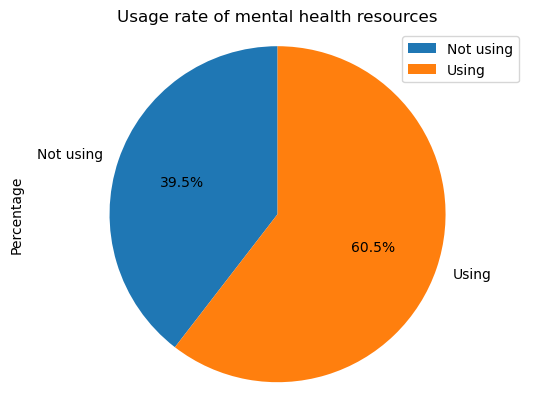

In [153]:
#Pie Chart
non_usage_p = 39.54
usage_p = 60.46

data = {'Category': ['Not using', 'Using'],
        'Percentage': [non_usage_p, usage_p]}

df = pd.DataFrame(data)

plt.figure(figsize=(6, 6))
df['Percentage'] = df['Percentage'].astype(float) 
df.plot(kind='pie', y='Percentage', labels=df['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Usage rate of mental health resources')
plt.axis('equal')

plt.show()


In [154]:
new_filtered_rows1 = main_df.loc[
    (main_df["'Self-Employed' insurance provides mental health benefits"] == "No") &
    (main_df["Are you seeking help"] == "Yes")
]

total1 = len(new_filtered_rows1)

print(f"Total people who are self employed who dont have mental health resources but are seeking help : {total1}")
new_filtered_rows3 = main_df.loc[
    (main_df["'Self-Employed' insurance provides mental health benefits"] == "No") &
    (main_df["Are you seeking help"] == "No")
]

total3 = len(new_filtered_rows3)

print(f"Total people who are self employed, who dont have mental health resources and aren't seeking help : {total3}")
new_filtered_rows2 = main_df.loc[
    (main_df["Employer provides mental health benefits"] == "No") &
    (main_df["Are you seeking help"] == "Yes")
]

total2 = len(new_filtered_rows2)

print(f"Total people who are employees who dont have mental health resources but are seeking help : {total2}")
new_filtered_rows4 = main_df.loc[
    (main_df["Employer provides mental health benefits"] == "No") &
    (main_df["Are you seeking help"] == "No")
]

total4 = len(new_filtered_rows4)

print(f"Total people who are employees who dont have mental health resources but aren't seeking help : {total4}")
total_need= (total1+total2)
total_need

total_dont= (total3+total4)
total_dont

com_total= (total1+total2+total3+total4)
com_total
c=total_need/com_total*100
d=total_dont/com_total*100
per_c="{:.2f}%".format(c)
per_d="{:.2f}%".format(d)
(f'"the percentages are {per_c} and {per_d}"')


Total people who are self employed who dont have mental health resources but are seeking help : 38
Total people who are self employed, who dont have mental health resources and aren't seeking help : 34
Total people who are employees who dont have mental health resources but are seeking help : 76
Total people who are employees who dont have mental health resources but aren't seeking help : 98


'"the percentages are 46.34% and 53.66%"'

<Figure size 600x600 with 0 Axes>

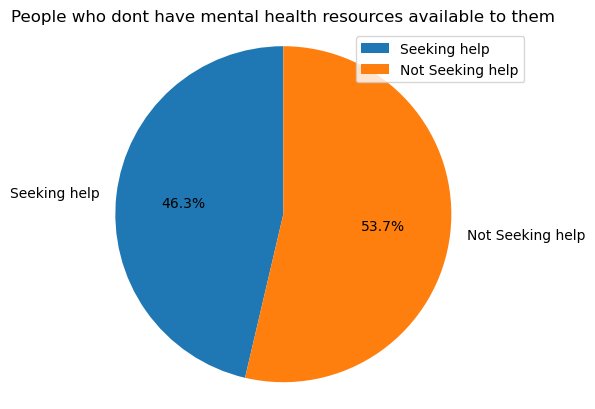

In [155]:
#Pie Chart
per_c = 46.34
per_d = 53.66

data2 = {'Category2': ['Seeking help', 'Not Seeking help'],
        'Percentage2': [per_c, per_d]}

df = pd.DataFrame(data2)



plt.figure(figsize=(6, 6))
df['Percentage2'] = df['Percentage2'].astype(float) 
df.plot(kind='pie', y='Percentage2', labels=df['Category2'], autopct='%1.1f%%', startangle=90)
plt.title('People who dont have mental health resources available to them')
plt.axis('equal')
plt.ylabel('')
plt.show()


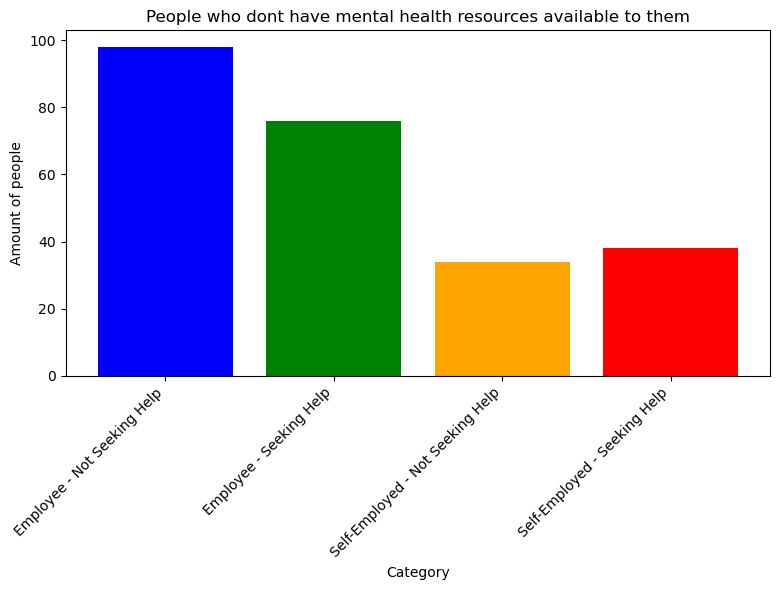

In [156]:
#Prob not going to use 
data = {
    'Category': ['Employee - Not Seeking Help', 'Employee - Seeking Help', 
                 'Self-Employed - Not Seeking Help', 'Self-Employed - Seeking Help'],
    "values": [98, 76, 34, 38]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df['Category'], df["values"], color=['blue', 'green', 'orange', 'red'])
plt.title('People who dont have mental health resources available to them')
plt.xlabel('Category')
plt.ylabel('Amount of people')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Brendan
Section to investigate the following:
How does social perception of mental health affect utilization rate? - Brendan

    Visualize differences in MHR utilization at companies depending on perception of mental health